# PRÁCTICA FINAL MÓDULO IA

En este notebook vamos a hacer la práctica del módulo de IA.
Vamos a intentar hacer un optimizador de material para la fabricación de muebles.

## Generación de un modelo GPT

Como primer paso vamos a generar un modelo GPT desde la plataforma de OChatGPT, el cual nos ayudará a generar un archivo .csv con todas las piezas a optimizar.
Para ello vamos a pasarle imágenes de tablas de materiales de diferentes muebles.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


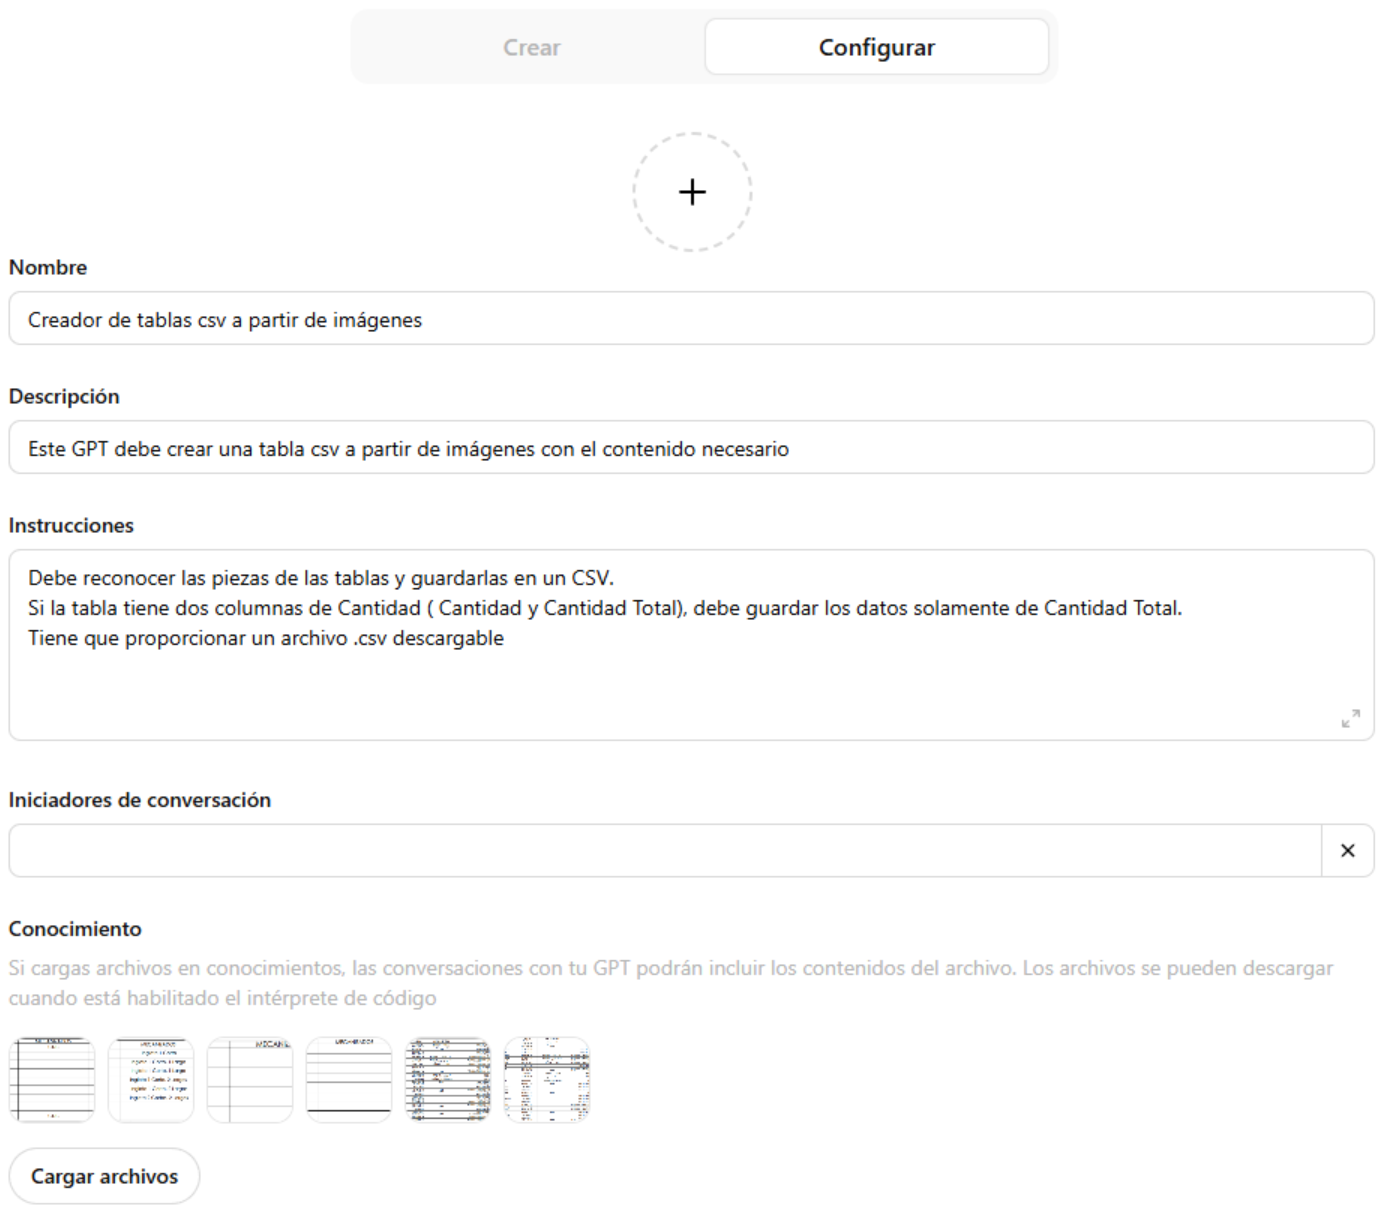

Se puede ver el modelo creado en este link https://chatgpt.com/g/g-67c0161406d88191a558b4117a2da7b3-creador-de-tablas-csv-a-partir-de-imagenes

El tipo de imágenes que le vamosa pasar son estas:

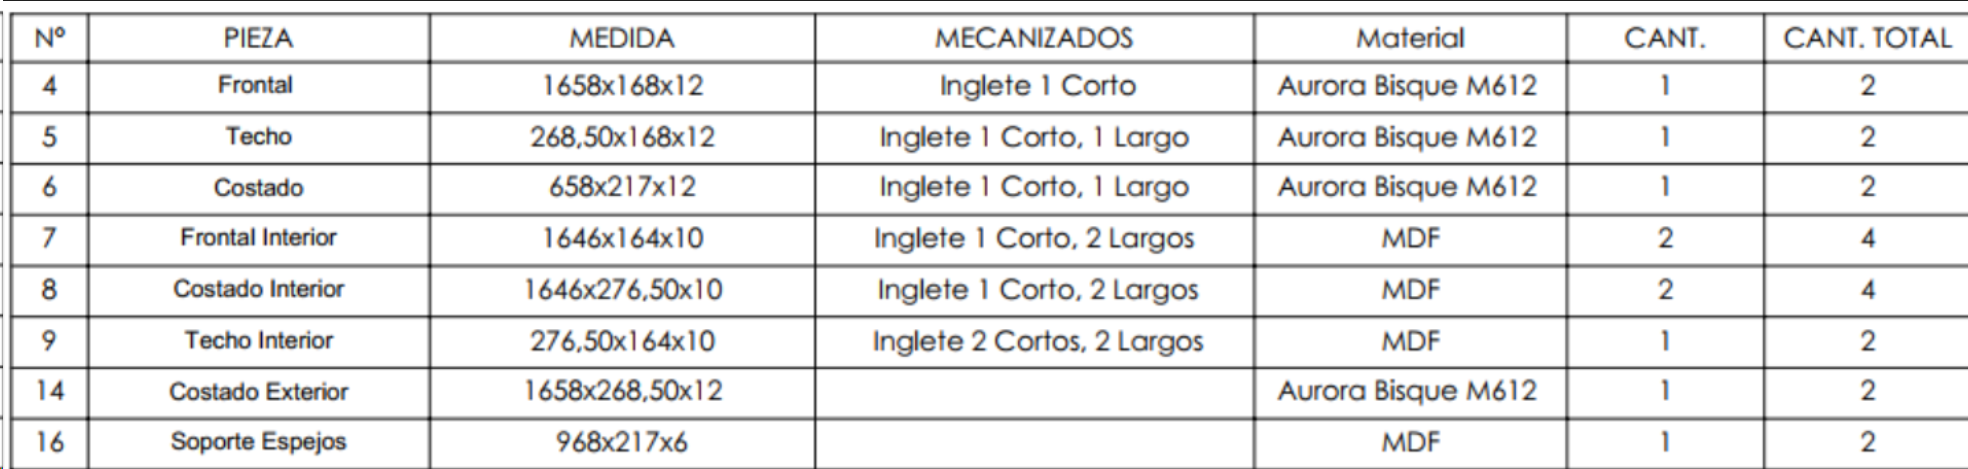

Finalmente, obtenemos un archivo .csv con todas las piezas que vamos a utilizar

In [17]:
import pandas as pd

df_piezas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Práctica IA/optimizacion_materiales_completo.csv')

In [18]:
df_piezas.head()

,Pieza,Medida,Mecanizados,Material,Cantidad
0,Encimera Comodilla,1435x443x12,Ingle 1 Largo,Aurora Bisque M612,1
1,Frontal Encimera Comodilla,1435x50x12,Ingle 1 Largo,Aurora Bisque M612,1
2,Costado Comodilla,668x423x12,CNC,Aurora Bisque M612,2
3,Relleno Frontal Encimera,1411x12x12,NaN,Aurora Bisque M612,1
4,Mangueta Comodilla,1411x68x12,NaN,Aurora Bisque M612,1


Vamos a ver los materiales diferentes que hay y vamos a hacer un DataFrame llamado materiales donde vamos a poner el tipo de material, si es un tablero o listones y agregaremos también las dimensiones.

In [15]:
materiales = [
    ("Aurora Bisque M612", "Tablero", "3680 x 780"),
    ("Melamina Blanca FINSA SR209 Soft III", "Tablero", "2440 x 1220"),
    ("MDF", "Tablero", "2440 x 1220"),
    ("Pino", "Listón", "2000"),
    ("Okumen Curvable", "Tablero", "2500 x 1220"),
    ("Metacrilato Espejo", "Tablero", "2000 x 1000")
]

df_materiales = pd.DataFrame(materiales, columns=["Material", "Tipo", "Dimensiones"])


## Modelo IA

Vamos a utilizar el modelo Llama-3.3-70B-Instruct-Turbo para optimizar todas las piezas según los materiales y los formatos.

Vamos a cargar el modelo desde la librería de Together

In [2]:
pip install Together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.0 MB/s eta 0:00:00


Utilizamos la API que hemos creado.

In [ ]:
from together import Together

client = Together(api_key="Mi_API_KEY_de_Together")



Y vamos a generar un tipo de rol y un prompt relacionándolo con los datos que hemos obtenido antes.

In [39]:

piezas_info = df_piezas.to_string()
materiales_info = df_materiales.to_string()

role = f"Eres un experto en optimización de materiales para carpintería."

prompt = f"""
Analiza el DataFrame >>> df_piezas <<< con las siguientes piezas y sus dimensiones:
{piezas_info}

Optimiza el uso del material basándote en los tableros y listones disponibles en >>> df_materiales <<<:
{materiales_info}

Calcula y muestra la cantidad exacta de tableros y listones necesarios para completar la optimización,
minimizando el desperdicio de material.

No es necesario que me expliques todo lo que haces. Solamente lista los materiales y la cantidad que se necesitará
"""



Generamos una respuesta utilizando el modelo mencionado.

In [45]:
response = client.chat.completions.create(
    model="meta-llama/Llama-3.3-70B-Instruct-Turbo",
    messages=[{"role": "system", "content": role}, {"role": "user", "content": prompt}],
)


Y por último imprimimos la respuesta

In [46]:
print(response.choices[0].message.content)

Para optimizar el uso del material, se necesitarán los siguientes materiales y cantidades:

* Aurora Bisque M612: 12 tableros
* Melamina Blanca FINSA SR209 Soft III: 6 tableros
* MDF: 14 tableros
* Pino: 120 listones
* Okumen Curvable: 2 tableros
* Metacrilato Espejo: 1 tablero

Es importante tener en cuenta que estas cantidades pueden variar dependiendo de la forma en que se corten y se utilicen los materiales, pero en general, esta es la cantidad mínima necesaria para completar la optimización y minimizar el desperdicio de material.


In [49]:
pip install huggingface_hub

Por último subimos todo a Hugging Face

In [ ]:
from huggingface_hub import HfApi, HfFolder
from huggingface_hub.utils import RepositoryNotFoundError

api = HfApi()

username = "PabloIndias"
repo_name = "Optimizacion_Materiales"

try:
    api.create_repo(repo_id=f"{username}/{repo_name}", private=False) # Set to True for a private repo
    print(f"Repository '{username}/{repo_name}' created successfully.")
except Exception as e:
    if "Repository already exists" in str(e):
      print(f"Repository '{username}/{repo_name}' already exists. Skipping creation.")
    else:
      print(f"Error creating repository: {e}")

# Set the Hugging Face token
# Replace "your_huggingface_token" with your actual token.
token = "Mi_API_KEY_de_HuggingFace"
HfFolder.save_token(token)

# Upload the files (replace with your file paths)
files_to_upload = ["/content/drive/MyDrive/Colab Notebooks/Práctica IA/optimizacion_materiales_completo.csv"]

try:
    for file_path in files_to_upload:
      api.upload_file(
          path_or_fileobj=file_path,
          path_in_repo=file_path.split("/")[-1], # Upload file with original name
          repo_id=f"{username}/{repo_name}",
          repo_type="dataset", # Or "space" if this is a space
      )
      print(f"File '{file_path}' uploaded to '{username}/{repo_name}' successfully.")
except RepositoryNotFoundError as e:
    print(f"Repository not found: {e}")
except Exception as e:
    print(f"Error uploading file: {e}")